# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
# Daniel Shapira 208310607 danielshapira3@gmail.com
# Details Student 2:
# Daniel Papkov 211516232 papkovdaniel1@gmail.com

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
# pip install wn
# python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
# pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

c:\Users\beta\Desktop\NLP2\NLP-Project


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [11]:

final_stories =[] ## this will be the final list of stories that are in hebrew
for story in df_train.story:
    tokens=ht.tokenize(story)
    hebrew_words=[] ## list of the words in hebrew after filtered
    for _type,token,_ ,_  in tokens:## we dont need _1 and _2 they are just place holders
        if(_type=="HEBREW"):
            hebrew_words.append(token)
    single_story_in_hebrew = " ".join(hebrew_words)## add all the words in the order they apeard back such that they are seperated by space
    final_stories.append(single_story_in_hebrew) ## add each story back to the dataframe 
    ##print (single_story_in_hebrew)


In [12]:
# # Define the percentage of data for evaluation (10%)
# eval_percentage = 0.1
# eval_size = int(eval_percentage * len(df_train))

# # Evaluate F1-score for different chunks of data
# best_f1_score = 0.0
# best_data_chunk = None

# for i in range(0, len(df_train), eval_size):
#     data_chunk = df_train.iloc[i:i+eval_size]
    
#     # Evaluate F1-score for this chunk
#     y = data_chunk['gender']
#     y_pred_random = y.sample(frac=1, random_state=0)  # Random baseline
#     chunk_f1_score = f1_score(y, y_pred_random, average='weighted')
    
#     if chunk_f1_score > best_f1_score:
#         best_f1_score = chunk_f1_score
#         best_data_chunk = data_chunk

# print(f"Best data chunk with F1-score: {best_f1_score}")

# # Now you can use the best_data_chunk for training models
# print("Best data chunk:")
# print(best_data_chunk)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

vectorizers = [TfidfVectorizer(max_features=1000), CountVectorizer(max_features=1000)]
vectorizer_names = ['TfidfVectorizer', 'CountVectorizer']
n_neighbors_values = [1, 3]

for vectorizer, vectorizer_name in zip(vectorizers, vectorizer_names):
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    for n_neighbors in n_neighbors_values:
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn_model.fit(X_train_vectorized, Y_train)
        y_pred = knn_model.predict(X_test_vectorized)
        
        # Calculate F1-score when male writers are considered positive class
        f1_male = f1_score(Y_test, y_pred, pos_label='m')
        # Calculate F1-score when female writers are considered positive class
        f1_female = f1_score(Y_test, y_pred, pos_label='f')

        print(f"F1-score for KNN with n_neighbors={n_neighbors} using {vectorizer_name}:")
        print(f"  F1-score when male writers are positive class: {f1_male}")
        print(f"  F1-score when female writers are positive class: {f1_female}")
        
        # Calculate average F1-score
        average_f1 = (f1_male + f1_female) / 2
        print(f"  Average F1-score: {average_f1}")

KNeighborsClassifier(n_neighbors=1)

F1-score for KNN with n_neighbors=1 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.776255707762557
  F1-score when female writers are positive class: 0.4096385542168674
  Average F1-score: 0.5929471309897122


KNeighborsClassifier(n_neighbors=3)

F1-score for KNN with n_neighbors=3 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.8209606986899564
  F1-score when female writers are positive class: 0.4383561643835616
  Average F1-score: 0.629658431536759


KNeighborsClassifier(n_neighbors=1)

F1-score for KNN with n_neighbors=1 using CountVectorizer:
  F1-score when male writers are positive class: 0.834710743801653
  F1-score when female writers are positive class: 0.3333333333333333
  Average F1-score: 0.5840220385674931


KNeighborsClassifier(n_neighbors=3)

F1-score for KNN with n_neighbors=3 using CountVectorizer:
  F1-score when male writers are positive class: 0.8292682926829269
  F1-score when female writers are positive class: 0.25
  Average F1-score: 0.5396341463414634


In [44]:
# X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)
# n_clusters_values = [2, 3, 4, 5]

# for vectorizer, vectorizer_name in zip(vectorizers, vectorizer_names):
#     X_train_vectorized = vectorizer.fit_transform(X_train)
#     X_test_vectorized = vectorizer.transform(X_test)

#     for n_clusters in n_clusters_values:
#         kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
#         kmeans_model.fit(X_train_vectorized)
#         cluster_labels = kmeans_model.predict(X_test_vectorized)
        
#         # Convert cluster labels to original class labels
#         cluster_labels_mapped = ['f' if label == 0 else 'm' for label in cluster_labels]

#         kmeans_f1_score = f1_score(Y_test, cluster_labels_mapped, average='weighted')

#         print(f"F1-score for KMeans with n_clusters={n_clusters} using {vectorizer_name}: {kmeans_f1_score}")

X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)
n_clusters_values = [2, 3, 4, 5]

for vectorizer, vectorizer_name in zip(vectorizers, vectorizer_names):
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    for n_clusters in n_clusters_values:
        kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans_model.fit(X_train_vectorized)
        cluster_labels = kmeans_model.predict(X_test_vectorized)
        
        # Convert cluster labels to binary class labels (positive/negative)
        cluster_labels_mapped = ['f' if label == 0 else 'm' for label in cluster_labels]

        # Calculate F1-score when male writers are considered positive class
        f1_male = f1_score(Y_test, cluster_labels_mapped, pos_label='m')
        # Calculate F1-score when female writers are considered positive class
        f1_female = f1_score(Y_test, cluster_labels_mapped, pos_label='f')

        print(f"F1-score for KMeans with n_clusters={n_clusters} using {vectorizer_name}:")
        print(f"  F1-score when male writers are positive class: {f1_male}")
        print(f"  F1-score when female writers are positive class: {f1_female}")
        
        # Calculate average F1-score
        average_f1 = (f1_male + f1_female) / 2
        print(f"  Average F1-score: {average_f1}")


KMeans(n_clusters=2, random_state=0)

F1-score for KMeans with n_clusters=2 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.4678362573099415
  F1-score when female writers are positive class: 0.3053435114503817
  Average F1-score: 0.3865898843801616


KMeans(n_clusters=3, random_state=0)

F1-score for KMeans with n_clusters=3 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.7577092511013216
  F1-score when female writers are positive class: 0.26666666666666666
  Average F1-score: 0.5121879588839942


KMeans(n_clusters=4, random_state=0)

F1-score for KMeans with n_clusters=4 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.751131221719457
  F1-score when female writers are positive class: 0.3209876543209877
  Average F1-score: 0.5360594380202224


KMeans(n_clusters=5, random_state=0)

F1-score for KMeans with n_clusters=5 using TfidfVectorizer:
  F1-score when male writers are positive class: 0.8097165991902835
  F1-score when female writers are positive class: 0.14545454545454545
  Average F1-score: 0.4775855723224145


KMeans(n_clusters=2, random_state=0)

F1-score for KMeans with n_clusters=2 using CountVectorizer:
  F1-score when male writers are positive class: 0.6395939086294417
  F1-score when female writers are positive class: 0.3238095238095238
  Average F1-score: 0.48170171621948277


KMeans(n_clusters=3, random_state=0)

F1-score for KMeans with n_clusters=3 using CountVectorizer:
  F1-score when male writers are positive class: 0.7069767441860464
  F1-score when female writers are positive class: 0.27586206896551724
  Average F1-score: 0.4914194065757818


KMeans(n_clusters=4, random_state=0)

F1-score for KMeans with n_clusters=4 using CountVectorizer:
  F1-score when male writers are positive class: 0.8319999999999999
  F1-score when female writers are positive class: 0.1923076923076923
  Average F1-score: 0.5121538461538461


KMeans(n_clusters=5, random_state=0)

F1-score for KMeans with n_clusters=5 using CountVectorizer:
  F1-score when male writers are positive class: 0.7896995708154506
  F1-score when female writers are positive class: 0.2898550724637681
  Average F1-score: 0.5397773216396093


#### Lets Create a short function to represent how good the model classifies our stories in a ConfusionMatrix ####

In [37]:
# def plot_confusion_matrix(Y_test, y_pred, labels=['Male', 'Female']):
#     conf_matrix = confusion_matrix(Y_test, y_pred)
#     outcomes = ['Correct', 'Incorrect']
#     conf_matrix_labels = [[f"{label} {outcome} ({count})" for outcome, count in zip(outcomes, row)] for label, row in zip(labels, conf_matrix)]
    
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=conf_matrix_labels, fmt="", cmap="Blues", cbar=False)
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.title('Confusion Matrix')
#     plt.show()

# def plot_confusion_matrix(Y_test, y_pred, labels=['Male', 'Female']):
#     conf_matrix = confusion_matrix(Y_test, y_pred)
#     outcomes = ['Correct', 'Incorrect']
#     conf_matrix_labels = [[f"{label} {outcome} ({count})" for outcome, count in zip(outcomes, row)] for label, row in zip(labels, conf_matrix)]
    
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=conf_matrix_labels, fmt="", cmap="Blues", cbar=False)
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.title('Confusion Matrix')
#     plt.show()

def plot_confusion_matrix(y_true, y_pred, labels, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()


#### Checking Perceptron with TfidfVectorizer ####

Perceptron()

F1-score for Perceptron:
  F1-score when male writers are positive class: 0.8571428571428572
  F1-score when female writers are positive class: 0.5352112676056339
  Average F1-score: 0.6961770623742456


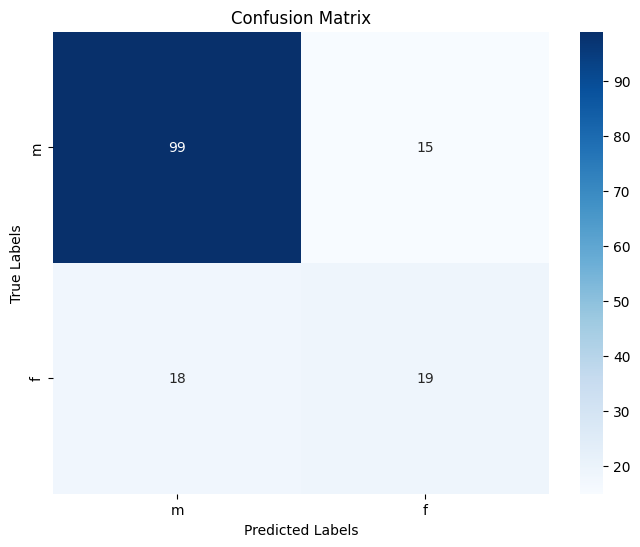

Top 20 words for Male writers:
Female: לאחר: 1.3610
Female: שעות: 1.3436
Female: בגלל: 1.2944
Female: אשתי: 1.2923
Female: עקב: 1.2913
Female: זוכר: 1.2681
Female: כמה: 1.2496
Female: אני: 1.2449
Female: אם: 1.2145
Female: התחיל: 1.1965
Female: לכל: 1.1682
Female: אוהב: 1.1637
Female: מדובר: 1.1604
Female: עליתי: 1.1251
Female: רכב: 1.1241
Female: למה: 1.1072
Female: מגיע: 1.1013
Female: איזה: 1.0978
Female: הרי: 1.0934
Female: בת: 1.0808

Top 20 words for Female writers:
Male: נשאר: -1.0909
Male: נחמד: -1.0953
Male: ולא: -1.1028
Male: אבל: -1.1129
Male: עובדים: -1.1180
Male: יהיה: -1.1380
Male: שום: -1.1537
Male: שמדובר: -1.1666
Male: עוד: -1.1721
Male: חדשים: -1.1769
Male: בסדר: -1.1891
Male: בן: -1.2136
Male: חברה: -1.2421
Male: חשבתי: -1.3256
Male: שלו: -1.3601
Male: הציוד: -1.3992
Male: יכולה: -1.4735
Male: היינו: -1.7499
Male: צריכה: -1.7819
Male: יודעת: -2.1292


<Figure size 1000x600 with 0 Axes>

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,
         6.,  8.,  4.,  6.,  9.,  9.,  9., 19., 24., 21., 37., 35., 39.,
        42., 50., 49., 57., 61., 62., 54., 51., 48., 53., 36., 46., 25.,
        30., 24., 19., 15., 10., 11.,  4.,  6.,  5.,  3.,  5.]),
 array([-2.12922371, -2.05941857, -1.98961344, -1.9198083 , -1.85000317,
        -1.78019803, -1.7103929 , -1.64058776, -1.57078263, -1.5009775 ,
        -1.43117236, -1.36136723, -1.29156209, -1.22175696, -1.15195182,
        -1.08214669, -1.01234155, -0.94253642, -0.87273129, -0.80292615,
        -0.73312102, -0.66331588, -0.59351075, -0.52370561, -0.45390048,
        -0.38409534, -0.31429021, -0.24448508, -0.17467994, -0.10487481,
        -0.03506967,  0.03473546,  0.1045406 ,  0.17434573,  0.24415087,
         0.313956  ,  0.38376113,  0.45356627,  0.5233714 ,  0.59317654,
         0.66298167,  0.73278681,  0.80259194,  0.87239708,  0.94220221,
         1.01200734,  1.08181248,  1.15161761,  1.22142275,

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Feature Weights')

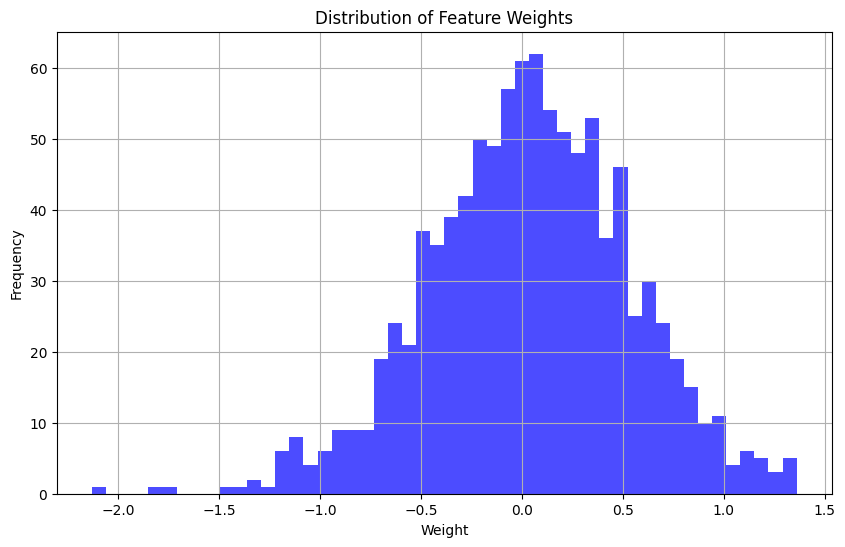

In [39]:
# X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

# # Initialize TF-IDF vectorizer
# vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# # Fit and transform on the training data
# x_train_tfidf = vectorizer.fit_transform(X_train)

# # Transform the test data using the same vectorizer
# x_test_tfidf = vectorizer.transform(X_test)

# # Initialize and train the Perceptron model
# perc = Perceptron()
# perc.fit(x_train_tfidf, Y_train)

# # Predict on the test data
# y_pred = perc.predict(x_test_tfidf)

# # Create a DataFrame to compare predictions with actual results
# df_temp = pd.DataFrame({"prediction": y_pred, "actual_res": Y_test})

# # Calculate F1 score
# f1 = f1_score(Y_test, y_pred, average='weighted')  # You can change 'weighted' to other options if needed

# print(f"F1 Score: {f1:.4f}")

# plot_confusion_matrix(Y_test,y_pred)

# feature_names = vectorizer.get_feature_names_out()

# # Get the coefficients of the Perceptron model
# coefficients = perc.coef_

# # Combine feature names and coefficients into a dictionary
# features_coefficients = dict(zip(feature_names, coefficients[0]))

# # Sort the dictionary by coefficient value (weight)
# sorted_features = sorted(features_coefficients.items(), key=lambda x: x[1], reverse=True)

# # Print top 10 words
# print("Top 20 words:")
# for feature, coefficient in sorted_features[:20]:
#     print(f"{feature}: {coefficient:.4f}")

# # Print bottom 10 words
# print("\nBottom 20 words:")
# for feature, coefficient in sorted_features[-20:]:
#     print(f"{feature}: {coefficient:.4f}")


# plt.figure(figsize=(10, 6))
# plt.hist(coefficients[0], bins=50, color='blue', alpha=0.7)
# plt.xlabel('Weight')
# plt.ylabel('Frequency')
# plt.title('Distribution of Feature Weights')
# plt.grid(True)
# plt.show()


X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000)
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

perc = Perceptron()
perc.fit(x_train_tfidf, Y_train)
y_pred = perc.predict(x_test_tfidf)

f1_male = f1_score(Y_test, y_pred, pos_label='m')
f1_female = f1_score(Y_test, y_pred, pos_label='f')

print(f"F1-score for Perceptron:")
print(f"  F1-score when male writers are positive class: {f1_male}")
print(f"  F1-score when female writers are positive class: {f1_female}")
average_f1 = (f1_male + f1_female) / 2
print(f"  Average F1-score: {average_f1}")

# Use your custom plot_confusion_matrix function
plot_confusion_matrix(Y_test, y_pred, labels=['m', 'f'])

# Sorting and printing top/bottom words
feature_names = vectorizer.get_feature_names_out()
coefficients = perc.coef_
features_coefficients = dict(zip(feature_names, coefficients[0]))
sorted_features = sorted(features_coefficients.items(), key=lambda x: x[1], reverse=True)

print("Top 20 words for Male writers:")
for feature, coefficient in sorted_features[:20]:
    print(f"Female: {feature}: {coefficient:.4f}")

print("\nTop 20 words for Female writers:")
for feature, coefficient in sorted_features[-20:]:
    print(f"Male: {feature}: {coefficient:.4f}")

# Feature weights histogram
plt.figure(figsize=(10, 6))
plt.hist(coefficients[0], bins=50, color='blue', alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Weights')
plt.grid(True)
plt.show()


#### Checking Perceptron with CountVectorizer ####

Perceptron()

F1-score for Perceptron:
  F1-score when male writers are positive class: 0.8389830508474576
  F1-score when female writers are positive class: 0.42424242424242425
  Average F1-score: 0.631612737544941


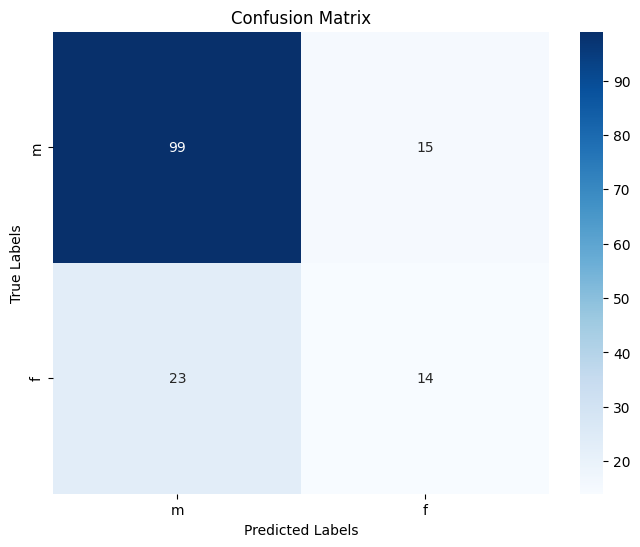

Top-Male 20 words:
למה: 55.0000
שעות: 53.0000
החברים: 50.0000
צריך: 46.0000
אם: 45.0000
עקב: 44.0000
התחיל: 42.0000
אדם: 41.0000
חבר: 41.0000
מספר: 41.0000
בגלל: 40.0000
בכל: 40.0000
יכול: 40.0000
קרה: 40.0000
זוכר: 37.0000
לאחר: 37.0000
אוהב: 36.0000
ביותר: 36.0000
חברים: 36.0000
יודע: 36.0000

Bottom-Female 20 words:
אבל: -37.0000
חשבתי: -37.0000
שלו: -37.0000
עובדים: -38.0000
ראש: -39.0000
חברות: -40.0000
יהיה: -40.0000
ים: -40.0000
האוטו: -41.0000
פעמים: -41.0000
שום: -42.0000
אליה: -43.0000
הציוד: -43.0000
אחת: -45.0000
היינו: -48.0000
יודעת: -53.0000
עוד: -53.0000
הקורונה: -54.0000
יכולה: -58.0000
צריכה: -61.0000


<Figure size 1000x600 with 0 Axes>

(array([ 1.,  1.,  0.,  3.,  0.,  1.,  1.,  2.,  3.,  5.,  6.,  5., 11.,
         8.,  8., 22., 11., 18., 33., 26., 19., 57., 49., 42., 53., 66.,
        48., 44., 66., 46., 47., 74., 38., 32., 42., 26., 16., 16., 13.,
        12.,  8.,  5.,  2.,  7.,  1.,  2.,  1.,  1.,  0.,  2.]),
 array([-61.  , -58.68, -56.36, -54.04, -51.72, -49.4 , -47.08, -44.76,
        -42.44, -40.12, -37.8 , -35.48, -33.16, -30.84, -28.52, -26.2 ,
        -23.88, -21.56, -19.24, -16.92, -14.6 , -12.28,  -9.96,  -7.64,
         -5.32,  -3.  ,  -0.68,   1.64,   3.96,   6.28,   8.6 ,  10.92,
         13.24,  15.56,  17.88,  20.2 ,  22.52,  24.84,  27.16,  29.48,
         31.8 ,  34.12,  36.44,  38.76,  41.08,  43.4 ,  45.72,  48.04,
         50.36,  52.68,  55.  ]),
 <BarContainer object of 50 artists>)

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Feature Weights')

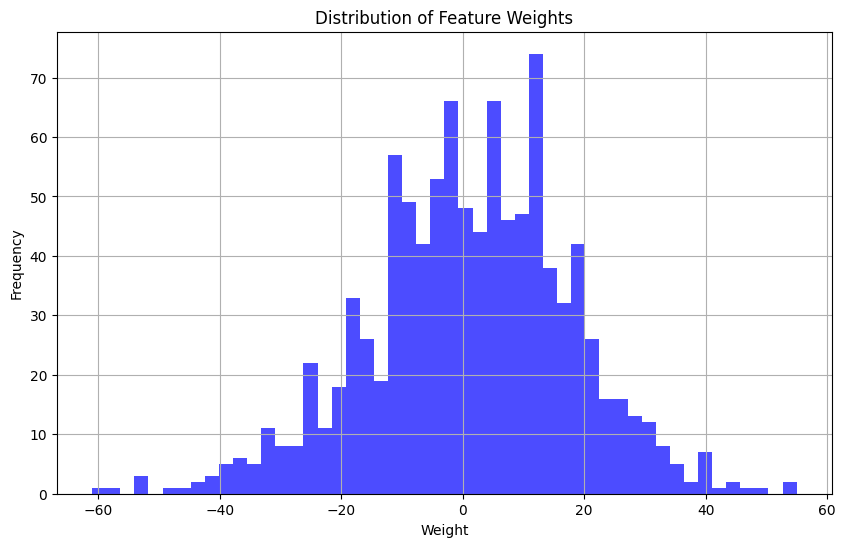

In [43]:

X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer(max_features=1000)
x_train_count = vectorizer.fit_transform(X_train)
x_test_count = vectorizer.transform(X_test)

perc = Perceptron()
perc.fit(x_train_count, Y_train)
y_pred = perc.predict(x_test_count)

f1_male = f1_score(Y_test, y_pred, pos_label='m')
f1_female = f1_score(Y_test, y_pred, pos_label='f')

print(f"F1-score for Perceptron:")
print(f"  F1-score when male writers are positive class: {f1_male}")
print(f"  F1-score when female writers are positive class: {f1_female}")
average_f1 = (f1_male + f1_female) / 2
print(f"  Average F1-score: {average_f1}")

# Use your custom plot_confusion_matrix function
plot_confusion_matrix(Y_test, y_pred, labels=['m', 'f'])

feature_names = vectorizer.get_feature_names_out()
coefficients = perc.coef_
features_coefficients = dict(zip(feature_names, coefficients[0]))
sorted_features = sorted(features_coefficients.items(), key=lambda x: x[1], reverse=True)

print("Top-Male 20 words:")
for feature, coefficient in sorted_features[:20]:
    print(f"{feature}: {coefficient:.4f}")

print("\nBottom-Female 20 words:")
for feature, coefficient in sorted_features[-20:]:
    print(f"{feature}: {coefficient:.4f}")

plt.figure(figsize=(10, 6))
plt.hist(coefficients[0], bins=50, color='blue', alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Weights')
plt.grid(True)
plt.show()


from the models shown above we can conclude the the ML agorithm has a much easier time guessing the males and when it comes to the females its not far from a coin flip

KNeighborsClassifier(n_neighbors=3)

KMeans(n_clusters=2, random_state=0)

Perceptron()

LinearSVC()

MLPClassifier()

DecisionTreeClassifier()

PCA(n_components=1)

Perceptron()

F1-score for Male Writers: 0.8593
F1-score for Female Writers: 0.0513
Average F1-score: 0.4553


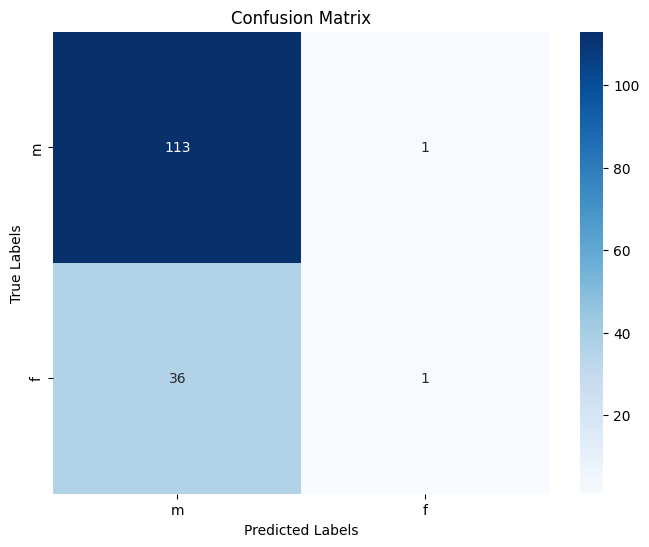

In [55]:

X_train, X_test, Y_train, Y_test = train_test_split(final_stories, df_train['gender'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000)
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)


# Train KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_vectorized, Y_train)
knn_preds = knn_model.predict(X_test_vectorized)

# Train KMeans
kmeans_model = KMeans(n_clusters=2, random_state=0)
kmeans_model.fit(X_train_vectorized)
kmeans_preds = kmeans_model.predict(X_test_vectorized)

# Train Perceptron
perc_model = Perceptron()
perc_model.fit(x_train_tfidf, Y_train)
perc_preds = perc_model.predict(x_test_tfidf)

# Train LinearSVC
svm_model = LinearSVC()
svm_model.fit(x_train_tfidf, Y_train)
svm_preds = svm_model.predict(x_test_tfidf)

# Train MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(x_train_tfidf, Y_train)
mlp_preds = mlp_model.predict(x_test_tfidf)

# Train DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_tfidf, Y_train)
dt_preds = dt_model.predict(x_test_tfidf)

# Apply PCA
pca = PCA(n_components=1)
pca.fit(x_train_tfidf.toarray())
x_test_pca = pca.transform(x_test_tfidf.toarray())

# Manually encode categorical predictions as numerical values
label_encoder = LabelEncoder()
knn_preds_encoded = label_encoder.fit_transform(knn_preds)
kmeans_preds_encoded = label_encoder.fit_transform(kmeans_preds)
perc_preds_encoded = label_encoder.fit_transform(perc_preds)
svm_preds_encoded = label_encoder.fit_transform(svm_preds)
mlp_preds_encoded = label_encoder.fit_transform(mlp_preds)
dt_preds_encoded = label_encoder.fit_transform(dt_preds)

# Combine predictions and PCA feature
combined_features = np.column_stack((
    knn_preds_encoded,
    kmeans_preds_encoded,
    perc_preds_encoded,
    svm_preds_encoded,
    mlp_preds_encoded,
    dt_preds_encoded,
    x_test_pca
))

# Train another ML model using the combined predictions as features
combined_model = Perceptron()

# Prepare target
combined_target = label_encoder.fit_transform(Y_test)

# Train the combined model
combined_model.fit(combined_features, combined_target)

# Make predictions using the combined model
combined_preds_encoded = combined_model.predict(combined_features)

# Decode the predictions back to original class labels
combined_preds = label_encoder.inverse_transform(combined_preds_encoded)

# Calculate F1-score for the combined approach
f1_combined = f1_score(Y_test, combined_preds, average='weighted')

#print(f"F1-score for Combined Approach: {f1_combined:.4f}")

f1_male = f1_score(Y_test, combined_preds, pos_label='m', average='binary')

# Calculate F1-score for females
f1_female = f1_score(Y_test, combined_preds, pos_label='f', average='binary')

# Calculate average F1-score
avg_f1 = (f1_male + f1_female) / 2

print(f"F1-score for Male Writers: {f1_male:.4f}")
print(f"F1-score for Female Writers: {f1_female:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")

#plot_confusion_matrix(Y_test, combined_preds, title='Combined Confusion Matrix')
plot_confusion_matrix(Y_test, combined_preds, labels=['m', 'f'])



as we can see the combined aproach doesnt help us much either 

the issue seems to be that most of our data is filled with males and therefor potentially giving them preference 

lets try to use cross_val_score and see if we can get anything decent

Cross-validation results:
Average F1-score for each fold: [0.57687535 0.60416667 0.5825603  0.61038961 0.6176822 ]
Best Average F1-score: 0.6176821983273596


Perceptron()


Results for Best Model (Full Test Set):
F1-score when male writers are positive class: 0.8389830508474576
F1-score when female writers are positive class: 0.42424242424242425
Average F1-score: 0.631612737544941


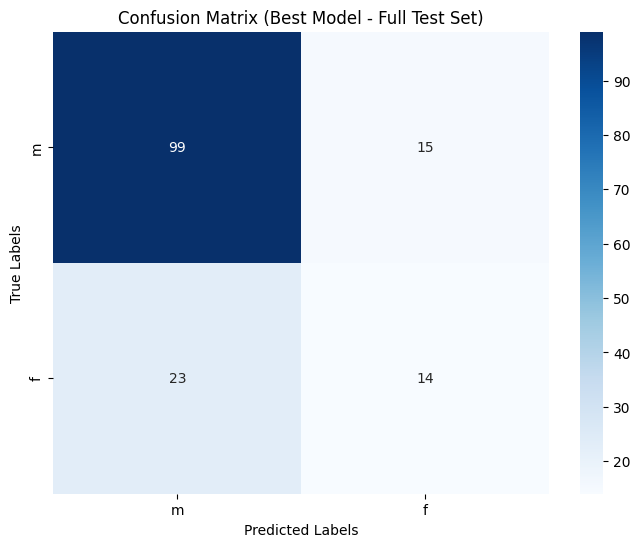

In [62]:
from sklearn.model_selection import cross_val_score

vectorizer = CountVectorizer(max_features=1000)

x_train_count = vectorizer.fit_transform(X_train)
x_test_count = vectorizer.transform(X_test)

perc = Perceptron()

# Perform cross-validation and calculate average F1-score
f1_scores = cross_val_score(perc, x_train_count, Y_train, cv=5, scoring='f1_macro')
best_f1_score = np.max(f1_scores)
best_model_index = np.argmax(f1_scores)

print("Cross-validation results:")
print(f"Average F1-score for each fold:", f1_scores)
print(f"Best Average F1-score:", best_f1_score)

# Train the best model on the full training set
best_model = Perceptron()
best_model.fit(x_train_count, Y_train)

# Predict on the test set using the best model
y_pred_best = best_model.predict(x_test_count)

# Calculate F1-scores and average F1-score for the full test set
f1_male_best = f1_score(Y_test, y_pred_best, pos_label='m')
f1_female_best = f1_score(Y_test, y_pred_best, pos_label='f')
average_f1_best = (f1_male_best + f1_female_best) / 2

print("\nResults for Best Model (Full Test Set):")
print(f"F1-score when male writers are positive class: {f1_male_best}")
print(f"F1-score when female writers are positive class: {f1_female_best}")
print(f"Average F1-score: {average_f1_best}")

# Use your custom plot_confusion_matrix function for the best model on the full test set
plot_confusion_matrix(Y_test, y_pred_best, labels=['m', 'f'], title='Confusion Matrix (Best Model - Full Test Set)')


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following: